In [29]:
#DATA_DIR = '../simulation_io/1000_worker_deptwl_0.3_290321_v0.0/'
#DATA_DIR = '../simulation_io/budget_off_260321_v0.0/'
DATA_DIR = '../simulation_io/normal_run_260321_v0.0/'


In [30]:
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import os, sys
MODEL_DIR = os.path.realpath(os.path.dirname('../superscript_model'))
sys.path.append(os.path.normpath(MODEL_DIR))
from superscript_model import model

In [35]:
#with open(DATA_DIR + 'Basic/agents_vars_rep_0.pickle', 'rb') as ifile:

with open(DATA_DIR + 'Random/projects_table_rep_0.pickle', 'rb') as ifile:
    random = pickle.load(ifile)

with open(DATA_DIR + 'Basic/projects_table_rep_0.pickle', 'rb') as ifile:
    basic = pickle.load(ifile)
    
with open(DATA_DIR + 'Basin/projects_table_rep_0.pickle', 'rb') as ifile:
    basin = pickle.load(ifile)

In [36]:
random

,project_id,prob,risk,budget,null,success,maximum_offset,realised_offset,start_time,ovr_prob_cpt,skill_balance_prob_cpt,creativity_match_prob_cpt,risk_prob_cpt,chemistry_prob_cpt,team_budget,team_ovr,team_creativity_match,team_size
0,1,0.000000,10,9.0,True,False,0,0,0,0.000000,0.000000,10.000000,3.75,0.000000,NaN,NaN,NaN,NaN
1,0,0.000000,10,89.0,False,False,0,0,0,21.187822,-9.550812,-29.943547,-3.75,5.000000,48.025730,28.250430,6.563233,5.0
2,8,0.000000,25,4.0,True,False,0,0,4,0.000000,0.000000,10.000000,3.75,0.000000,NaN,NaN,NaN,NaN
3,9,0.000000,5,6.0,True,False,0,0,4,0.000000,0.000000,10.000000,3.75,0.000000,NaN,NaN,NaN,NaN
4,2,0.020475,25,60.0,False,False,0,0,1,46.497630,-4.567985,-29.882107,-15.00,5.000000,40.297946,61.996840,5.826858,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,189,0.584976,5,19.0,False,True,0,0,94,43.834557,-1.456895,9.869955,0.00,6.875000,17.533823,58.446077,0.003256,4.0
192,188,0.000000,25,91.0,False,False,0,0,94,19.218142,-7.270019,-5.195090,-15.00,5.000000,44.842331,25.624189,0.477838,3.0
193,197,0.000000,25,88.0,True,False,0,0,98,0.000000,0.000000,10.000000,3.75,0.000000,NaN,NaN,NaN,NaN
194,190,0.000000,25,74.0,False,False,0,0,95,37.712452,-12.709547,-27.978724,-15.00,5.416667,52.797433,50.283269,2.985150,6.0


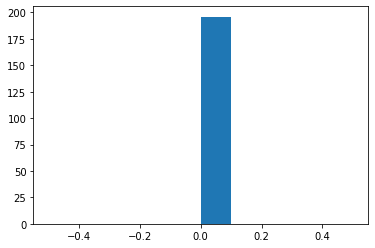

In [37]:
plt.hist(random.realised_offset);

In [38]:
print("Fraction of null projects.")
print("Random: ", np.round(sum(random.null) / len(random), 2))
print("Basin with timeline flex: ", np.round(sum(basic.null) / len(basic), 2))
print("Basin without timeline flex: ", np.round(sum(basin.null) / len(basin), 2))

Fraction of null projects.
Random:  0.23
Basin with timeline flex:  0.06
Basin without timeline flex:  0.01


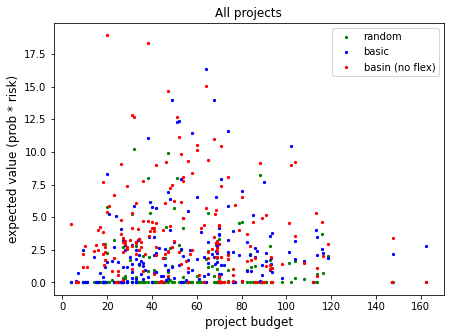

In [40]:
fs = 12
ps = 5
plt.figure(figsize=(7,5))
plt.scatter(random.budget,
            random.prob * random.risk,
            label='random', color='green', s=ps)

plt.scatter(basic.budget,
            basic.prob * basic.risk,
            label='basic', color='blue', s=ps)

plt.scatter(basin.budget,
            basin.prob * basin.risk,
            label='basin (no flex)', color='red', s=ps)

plt.xlabel("project budget", fontsize=fs)
plt.ylabel("expected value (prob * risk)", fontsize=fs)
plt.title("All projects")
plt.legend();

In [42]:
print("Mean probability of success.")
print("Random: ", np.round(np.mean(random.prob), 2))
print("Basic: ", np.round(np.mean(basic.prob), 2))
print("Basin without timeline flex: ", np.round(np.mean(basin.prob), 2))

Mean probability of success.
Random:  0.08
Basic:  0.21
Basin without timeline flex:  0.32


In [43]:
print("Fraction of successful projects.")
print("Random: ", np.round(sum(random.success) / len(random), 2))
print("Basic: ", np.round(sum(basic.success) / len(basic), 2))
print("Basin without timeline flex: ", np.round(sum(basin.success) / len(basin), 2))

Fraction of successful projects.
Random:  0.09
Basic:  0.21
Basin without timeline flex:  0.3


In [68]:
DATA_DIR = '../simulation_io/deptwl_0.6_260321_v0.0/'
with open(DATA_DIR + 'Random/model_vars_rep_0.pickle', 'rb') as ifile:
    test = pickle.load(ifile)

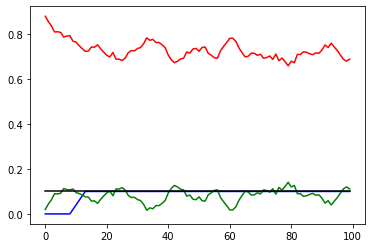

In [69]:
plt.plot(test.index, test.TrainingLoad, 'b')
plt.plot(test.index, test.ProjectLoad, 'g')
plt.plot(test.index, test.DeptLoad, 'k')
plt.plot(test.index, test.Slack, 'r')

In [60]:
DATA_DIR = '../simulation_io/normal_run_260321_v0.0/'
with open(DATA_DIR + 'Random/model_vars_rep_0.pickle', 'rb') as ifile:
    test = pickle.load(ifile)

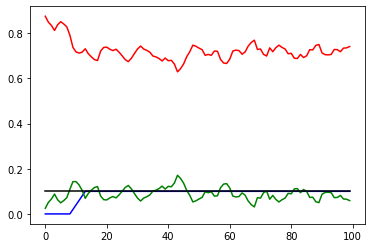

In [61]:
plt.plot(test.index, test.TrainingLoad, 'b')
plt.plot(test.index, test.ProjectLoad, 'g')
plt.plot(test.index, test.DeptLoad, 'k')
plt.plot(test.index, test.Slack, 'r')

In [47]:
test.columns

Index(['ActiveProjects', 'RecentSuccessRate', 'SuccessfulProjects',
       'FailedProjects', 'NullProjects', 'WorkersOnProjects',
       'WorkersWithoutProjects', 'WorkersOnTraining', 'AverageTeamSize',
       'AverageSuccessProbability', 'AverageWorkerOvr', 'AverageTeamOvr',
       'WorkerTurnover', 'ProjectLoad', 'TrainingLoad', 'DeptLoad', 'Slack',
       'ProjectsPerWorker'],
      dtype='object')